# Useful links
* http://darkhorseanalytics.com/
* https://www.kaggle.com/yakinrubaiat/canadian-immigration-from-1980-to-2013
* dataset - https://www.un.org/en/development/desa/population/migration/data/empirical2/data/UN_MigFlow_A_to_E.zip

# Matplotlib architecture
### 3 layers
* Backend layer
    * Figure canvas
    * renderer
    * event
       
* Artist layer
    * Knows how to use the renderer to draw on the canvas
    * Primitive 
        * Line , rectangle , circle , text
    * Composite
        * Axis , Tick , Axes , Figure
        * Each composite artist can contain both primitive and composite
* Scripting layer
    * Uses pyplot interface
    * Lighter than artist layer

In [54]:
%matplotlib inline
#%matplotlib notebook
#checks whether an active figure exists

In [13]:
#Artist
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

fig = Figure()
canvas = FigureCanvas(fig)

import numpy as np
x = np.random.randn(10000)

ax = fig.add_subplot(111) #1 row , 1 col , uses 1st cell for location of the new axes
ax.hist(x , 100)  # 100 bins

ax.set_title("Normal distribution")
fig.savefig("matplotlib_dist.png")

In [14]:
!open "matplotlib_dist.png"

In [110]:
import matplotlib as mpl
print(plt.style.available)
mpl.style.use(['ggplot'])

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


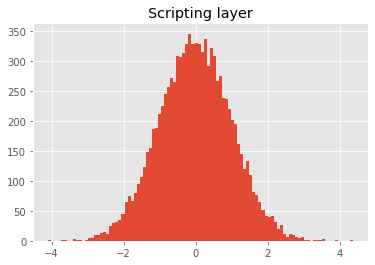

In [111]:
# scripting layer
import matplotlib.pyplot as plt
x = np.random.randn(10000)
plt.hist(x,100)
plt.title("Scripting layer")
plt.savefig("MPLscripthist.png")
plt.show()

# Matplotlib - Plot function

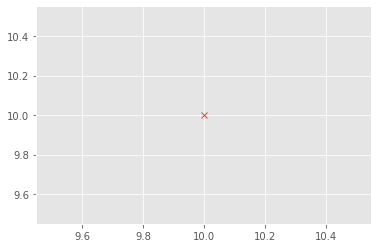

In [112]:
plt.plot(10,10 , "x")

In [33]:
import pandas as pd

/Users/vaibhav.singh/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [46]:
col1  = range(1,100,5)
col2 = range(1,200,10)
col = {"a" : col1 , "b" : col2}
df = pd.DataFrame(col)

In [50]:
df.sample()

,a,b
10,51,101


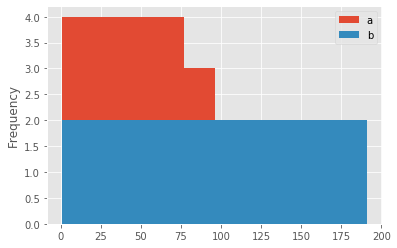

In [113]:
df.plot(kind='hist')

## Dataset
* Population division for 45 countries
* Focus is on immigration .. particularly canada

In [58]:
!pip install xlrd

In [61]:
PATH = "UNdatasets/"

In [63]:
df_can = pd.read_excel(
    f'{PATH}Canada.xlsx',
    sheet_name="Canada by Citizenship",
    skiprows=range(20),
    skip_footer = 2
)

In [67]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      197 non-null    object
 1   Coverage  197 non-null    object
 2   OdName    197 non-null    object
 3   AREA      197 non-null    int64 
 4   AreaName  197 non-null    object
 5   REG       197 non-null    int64 
 6   RegName   197 non-null    object
 7   DEV       197 non-null    int64 
 8   DevName   197 non-null    object
 9   1980      197 non-null    int64 
 10  1981      197 non-null    int64 
 11  1982      197 non-null    int64 
 12  1983      197 non-null    int64 
 13  1984      197 non-null    int64 
 14  1985      197 non-null    int64 
 15  1986      197 non-null    int64 
 16  1987      197 non-null    int64 
 17  1988      197 non-null    int64 
 18  1989      197 non-null    int64 
 19  1990      197 non-null    int64 
 20  1991      197 non-null    int64 
 21  1992      197 no

## When to use line plots?
* When you have a continuous dataset
* When you are interested in visualizing data over a period of time

In [77]:
df_can.rename(mapper={"OdName" : "Country" , "AreaName" : "Continent" , "RegName" : "Region"},axis=1,inplace=True)
df_can.sample()

,Type,Coverage,Country,AREA,Continent,REG,Region,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
18,Immigrants,Foreigners,Belize,904,Latin America and the Caribbean,916,Central America,902,Developing regions,16,...,25,37,24,28,48,38,39,36,34,53


In [78]:
df_country = df_can.set_index("Country").copy()

In [90]:

df_country["Total"] = df_country.filter(regex="\d+").sum(axis=1)

In [92]:
df_country.head()

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,1,1,0,0,0,0,1,1,15


1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object


Text(0.5, 0, 'Years')

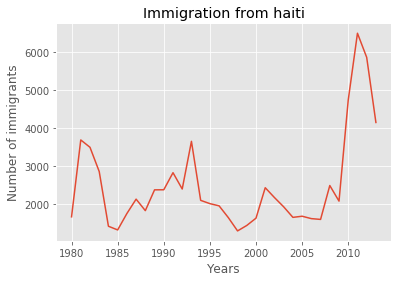

In [114]:
#lets plot immigration from Haiti to Canada over the years
count_per_year = df_country.loc['Haiti' , df_country.filter(regex="\d+").columns]
print (count_per_year[:5])
count_per_year.plot(kind = 'line')
plt.title("Immigration from haiti")
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

# Area plot
* Depicts cumulated totals using numbers or percentages over time

In [143]:
df_canada = df_country.sort_values(["Total" ], ascending=False).copy()
df_canada.head()

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Total,Immigrants,Both,999,World,999,World,999,World,143137,128641,...,262242,251640,236753,247244,252170,280687,248748,257903,259021,6924212
India,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,8880,8670,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Immigrants,Foreigners,935,Asia,906,Eastern Asia,902,Developing regions,5123,6682,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Immigrants,Foreigners,908,Europe,924,Northern Europe,901,Developed regions,22045,24796,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Unknown,Immigrants,Foreigners,999,World,999,World,999,World,44000,18078,...,4785,4583,4348,4197,3402,3731,2554,1681,1484,515059


In [144]:
years = df_canada.filter(regex='\d+').columns.to_list()
df_canada.drop("Total",axis=0,inplace=True)


In [148]:
df_top5 = df_canada[years]
df_top5 = df_top5.head(5)
df_top5 = df_top5.T
df_top5

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Unknown,Philippines
1980,8880,5123,22045,44000,6051
1981,8670,6682,24796,18078,5921
1982,8147,3308,20620,16904,5249
1983,7338,1863,10015,13635,4562
1984,5704,1527,10170,14855,3801
1985,4211,1816,9564,14368,3150
1986,7150,1960,9470,13303,4166
1987,10189,2643,21337,17304,7360
1988,11522,2758,27359,22279,8639
1989,10343,4323,23795,27118,11865


Text(0.5, 0, 'Years')

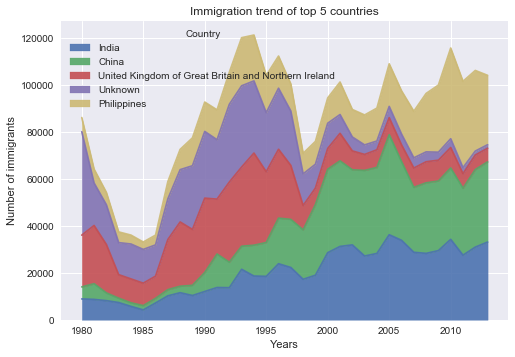

In [207]:
mpl.style.use("seaborn")
df_top5.plot(kind="area" , alpha=0.9)
plt.title("Immigration trend of top 5 countries")
plt.ylabel("Number of immigrants")
plt.xlabel("Years")

# histograms 
* A way of representing the frequency distribution of a varible

In [156]:
df_canada.sort_index(inplace=True)
df_canada.head()

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,1,1,0,0,0,0,1,1,15


Text(0, 0.5, 'Count of immigrants')

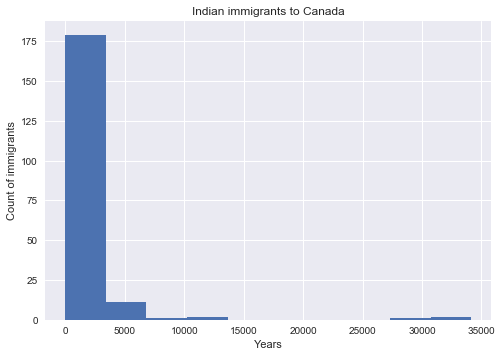

In [178]:
df_canada[2013].plot(kind="hist")
plt.title('Indian immigrants to Canada')
plt.xlabel("Years")
plt.ylabel("Count of immigrants")

Text(0, 0.5, 'Number of countries')

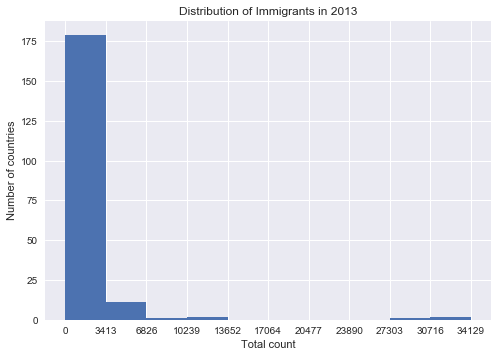

In [187]:
count , bin_edges = np.histogram(df_canada[2013])
df_canada[2013].plot(kind="hist" , xticks=bin_edges)
plt.title("Distribution of Immigrants in 2013")
plt.xlabel("Total count")
plt.ylabel("Number of countries")

# Bar chart
* length of each bar is proportional to the value it represents

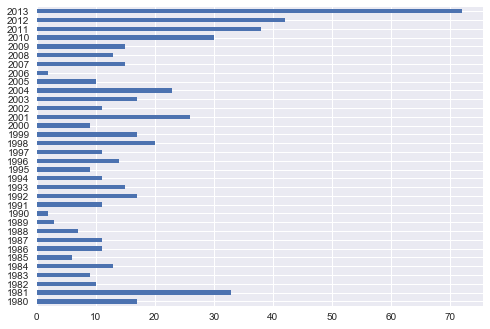

In [196]:
#plot comparative immigration from iceland across years
df_canada.loc["Iceland" , years].plot(kind="barh")

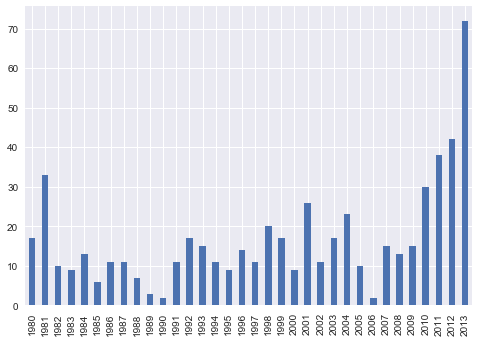

In [197]:
df_canada.loc["Iceland" , years].plot(kind="bar")

In [209]:
df_iceland = df_canada.loc['Iceland' , years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

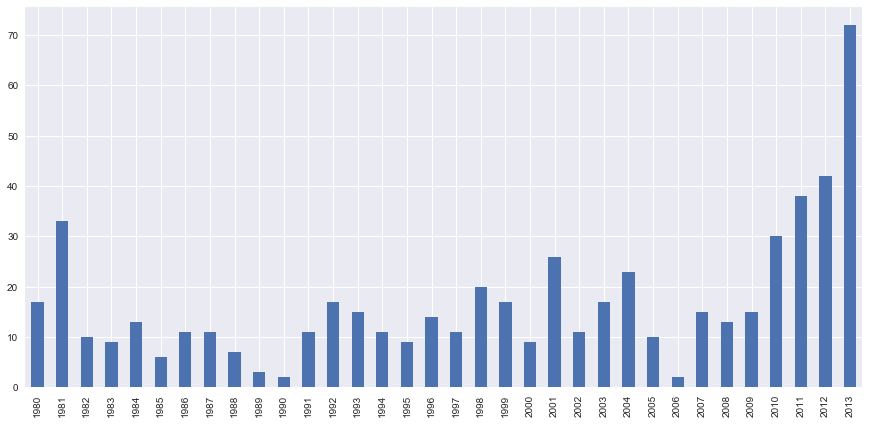

In [214]:
df_iceland.plot.bar(figsize=(15,7))

## Annotations
* Let's annotate this on the plot using the annotate method of the scripting layer or the pyplot interface.  
* We will pass in the following parameters: 
    * s: str, the text of annotation.  
    * xy: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow). 
    * xytext: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow). 
    * xycoords: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default). 
    * arrowprops: Takes a dictionary of properties to draw the arrow: 
    * arrowstyle: Specifies the arrow style, '->' is standard arrow. 
    * connectionstyle: Specifies the connection type. arc3 is a straight line. 
    * color: Specifes color of arror. 
    * lw: Specifies the line width. 

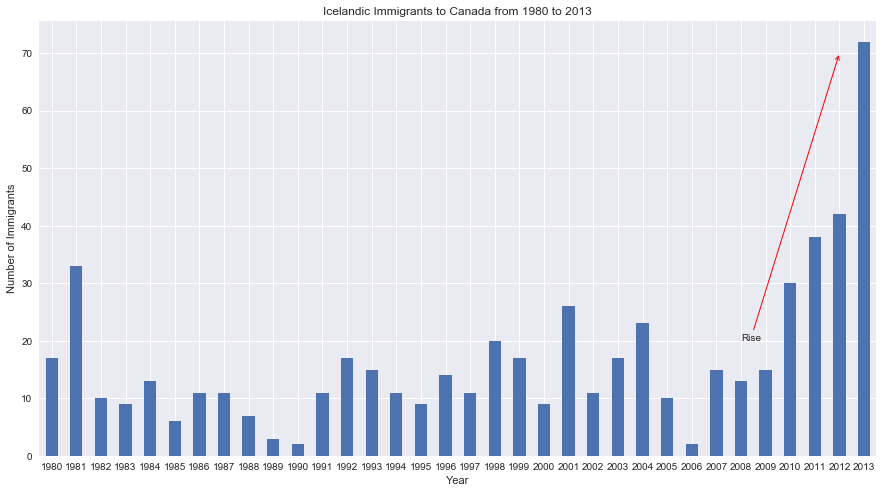

In [229]:
df_iceland.plot(kind='bar', figsize=(15, 8), rot=0) # rotate the bars by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('Rise',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=1)
            )

plt.show()


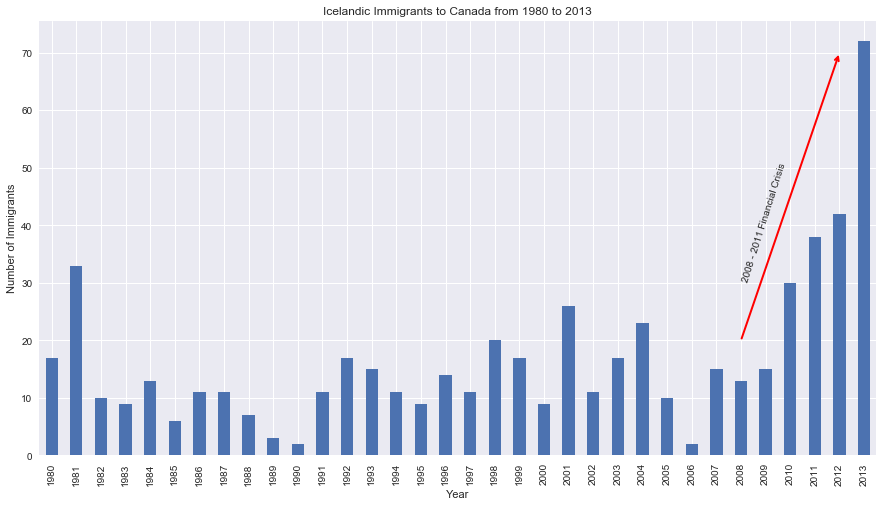

In [234]:
df_iceland.plot(kind='bar', figsize=(15, 8), rot=90) 

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2)
            )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

plt.show()

# Piechart

In [238]:
df_canada.drop(["Type" , "AREA" , "Coverage" , "DEV"],inplace=True , axis=1)
df_canada.head()

,Continent,REG,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,5501,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,925,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,912,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,957,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,925,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [241]:
df_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [242]:
df_canada["Total"] = df_canada[years].sum(axis=1)

In [243]:
df_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [262]:
df_piechart = df_canada.copy()
df_piechart.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [265]:
df_continents = df_piechart.groupby('Continent',axis=0).sum()
df_continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174
World,44000,18078,16904,13635,14855,14368,13303,17304,22279,27118,...,4785,4583,4348,4197,3402,3731,2554,1681,1484,515059


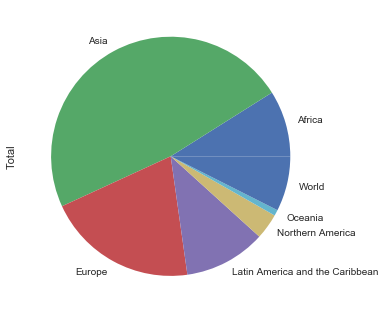

In [266]:
df_continents["Total"].plot(kind="pie")

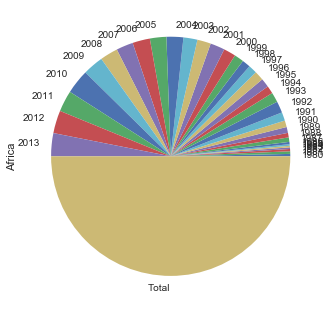

In [268]:
df_continents.loc["Africa"].plot(kind="pie")

### How does groupby work
<img src="groupby.png"/>

## Plot the data. 
* We will pass in kind = 'pie' keyword, along with the following additional parameters:
    * autopct - is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be fmt%pct.
    * startangle - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
    * shadow - Draws a shadow beneath the pie (to give a 3D feel).

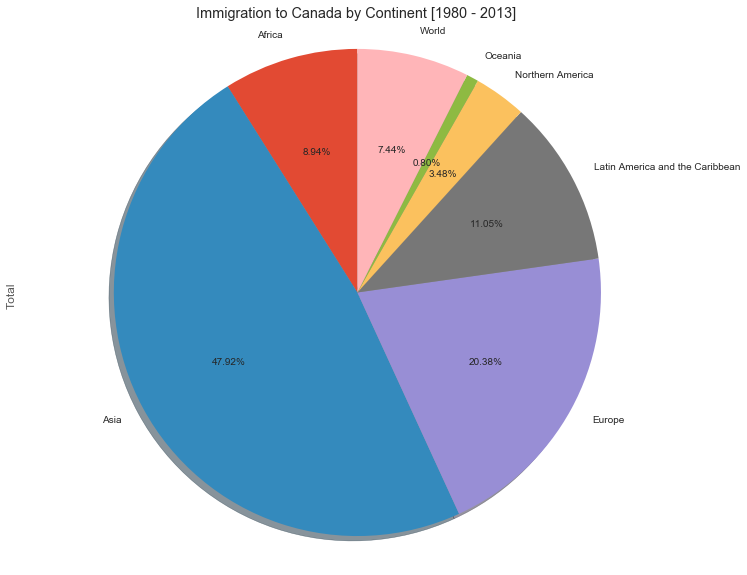

In [321]:
mpl.style.use("ggplot")
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(12, 10),
                            autopct='%1.2f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [324]:
df_continents["Total"]

Continent
Africa                              618948
Asia                               3317794
Europe                             1410947
Latin America and the Caribbean     765148
Northern America                    241142
Oceania                              55174
World                               515059
Name: Total, dtype: int64

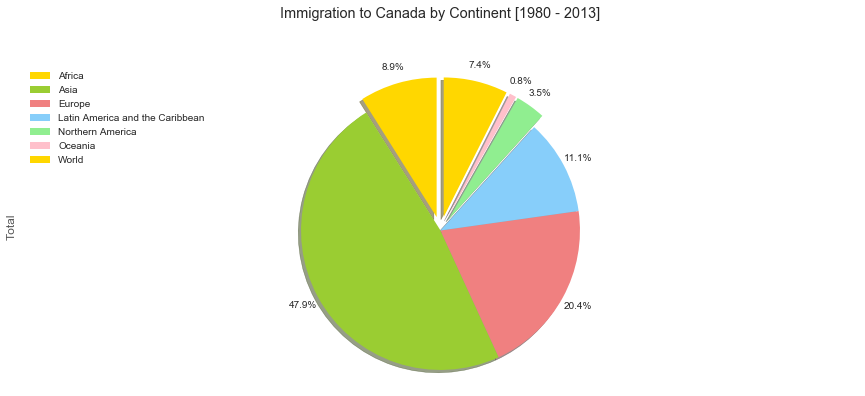

In [326]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1,0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,   
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

# Box Plot


In [270]:
df_canada.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


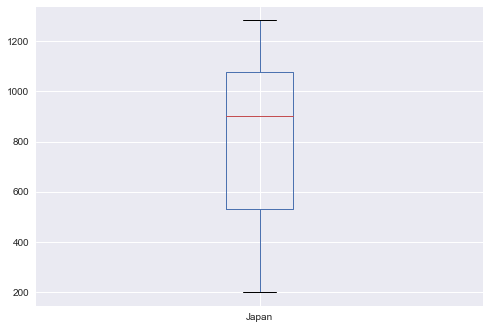

In [276]:
# Visualize Immigration from Japan to Canada
df_japan = df_canada.loc["Japan",years].T
df_japan.plot(kind="box")

In [327]:
df_CI= df_canada.loc[['China', 'India'], years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [328]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


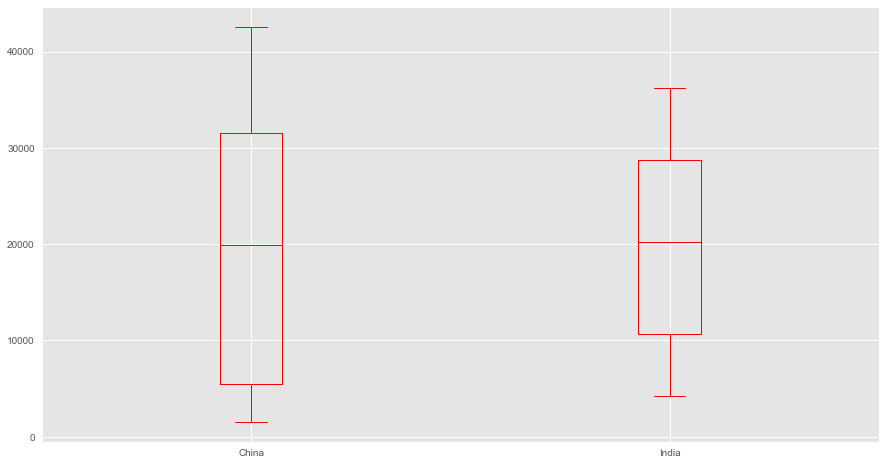

In [329]:
df_CI.plot(kind="box" , figsize=(15,8) , color="red")

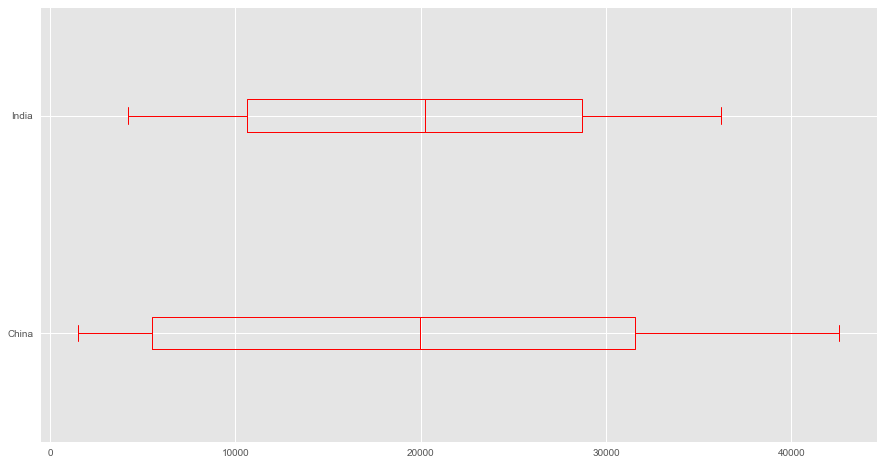

In [330]:
df_CI.plot(kind="box" , figsize=(15,8) , color="red" , vert=False)

**Subplots**

Often times we might want to plot multiple plots within the same figure. For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.

To visualize multiple plots together, we can create a **`figure`** (overall canvas) and divide it into **`subplots`**, each containing a plot. With **subplots**, we usually work with the **artist layer** instead of the **scripting layer**. 

Typical syntax is : <br>
```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```
Where
- `nrows` and `ncols` are used to notionally split the figure into (`nrows` \* `ncols`) sub-axes,  
- `plot_number` is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first and has a maximum of `nrows` * `ncols` as shown below.

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod3Fig5Subplots_V2.png" width=500 align="center">

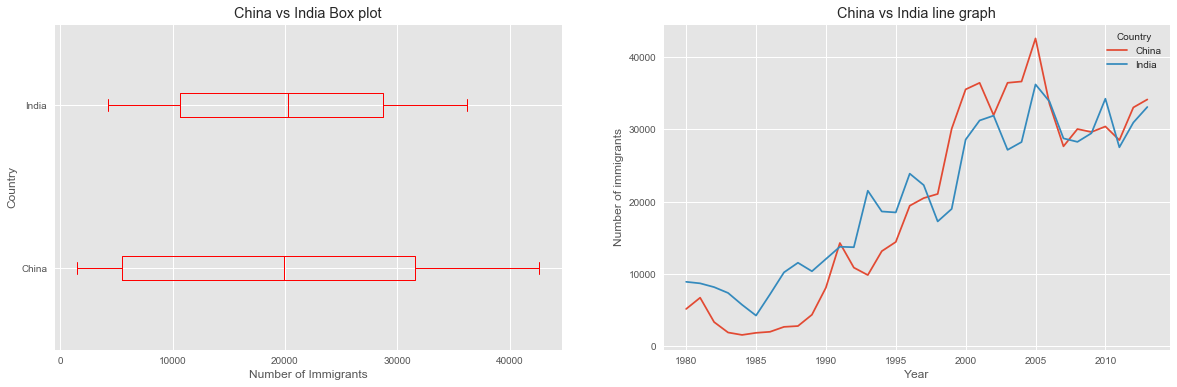

In [342]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.set_title("China vs India Box plot")
ax1.set_xlabel("Number of Immigrants")
ax1.set_ylabel("Country")

df_CI.plot(kind="box" , color="red" ,figsize=(20, 6), ax=ax1 , vert=False)
ax2.set_title("China vs India line graph")
ax2.set_xlabel("Year")
ax2.set_ylabel("Number of immigrants")
df_CI.plot(kind="line",figsize=(20, 6), ax=ax2)

**Tip regarding subplot convention**

In the case when nrows, ncols, and plot_number are all less than 10, a convenience exists such that the a 3 digit number can be given instead, where the hundreds represent nrows, the tens represent ncols and the units represent plot_number. For instance,

   subplot(211) == subplot(2, 1, 1) 

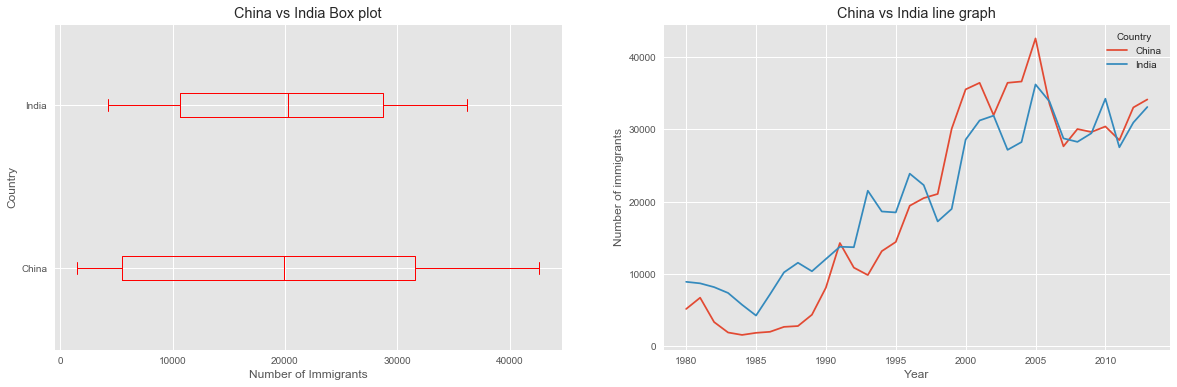

In [343]:
# Can give 211 instead of 2,1,1
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_title("China vs India Box plot")
ax1.set_xlabel("Number of Immigrants")
ax1.set_ylabel("Country")

df_CI.plot(kind="box" , color="red" ,figsize=(20, 6), ax=ax1 , vert=False)
ax2.set_title("China vs India line graph")
ax2.set_xlabel("Year")
ax2.set_ylabel("Number of immigrants")
df_CI.plot(kind="line",figsize=(20, 6), ax=ax2)

## Plot for decades for top 15 countries

In [347]:
df_top15 = df_canada.sort_values("Total",ascending=False).head(15)
df_top15 = df_top15[years]

#years_80s = list(map(str , range(1980,1990)))
#years_90s = list(map(str , range(1990,2000)))
#years_00s = list(map(str,range(2000,2010)))
years_80s = range(1980,1990)
years_90s = range(1990,2000)
years_00s = range(2000,2010)

df_80s = df_top15[years_80s].sum(axis=1)
df_90s = df_top15[years_90s].sum(axis=1)
df_00s = df_top15[years_00s].sum(axis=1)


new_df = pd.DataFrame({
    "1980s":df_80s ,
    "1990s":df_90s ,
    "2000s":df_00s 
} )
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,57367.066667,100016.400000,98022.533333
std,58707.863270,78556.702512,100300.494326
min,10591.000000,30028.000000,13629.000000
25%,19307.000000,44787.000000,36101.500000
50%,32003.000000,64864.000000,65794.000000
75%,68794.000000,150005.000000,105505.500000
max,201844.000000,261966.000000,340385.000000


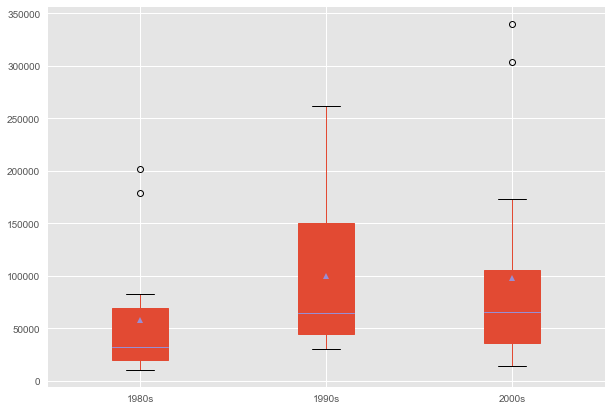

In [382]:
new_df.plot(kind="box",figsize=(10,7), patch_artist=True,showmeans=True)

In [367]:
desc = new_df.describe()
df = new_df["1980s"]
x = desc["1980s"]
iqr = x["75%"] - x["25%"]
upper_band = x["75%"] + 1.5* iqr

new_df[new_df["1980s"] > upper_band]

,1980s,1990s,2000s
Country,,,
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Unknown,201844,249985,53780


## How to label the 5 levels of boxplot or how to obtain those values?

# Scatter Plots
* Displays values pertaining to two variables which are usually related (dependent/independent)
* Used to determine correlation

In [278]:
df_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [301]:
# Plot a scatter plot of total annual immigration to canada from 1980 to 2013
df_tot_annual = df_canada[years].T
df_tot_annual["tot_per_year"]  = df_tot_annual.sum(axis=1)
df_tot_annual.head()

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe,tot_per_year
1980,16,1,80,0,0,1,0,368,0,702,...,128,0,0,103,1191,0,1,11,72,143137
1981,39,0,67,1,0,3,0,426,0,639,...,132,0,0,117,1829,0,2,17,114,128641
1982,39,0,71,0,0,6,0,626,0,484,...,146,0,0,174,2162,0,1,11,102,121175
1983,47,0,69,0,0,6,0,241,0,317,...,105,0,0,124,3404,0,6,7,44,89185
1984,71,0,63,0,0,4,42,237,0,317,...,90,0,0,142,7583,0,0,16,32,88272


In [306]:
df_tot_fin = pd.DataFrame()
df_tot_fin["year"] = list(map(str , range(1980,2014)))
df_tot_fin["total"] = df_tot_annual["tot_per_year"].values
df_tot_fin.head()

,year,total
0,1980,143137
1,1981,128641
2,1982,121175
3,1983,89185
4,1984,88272


Text(0, 0.5, 'Number of Immigrants')

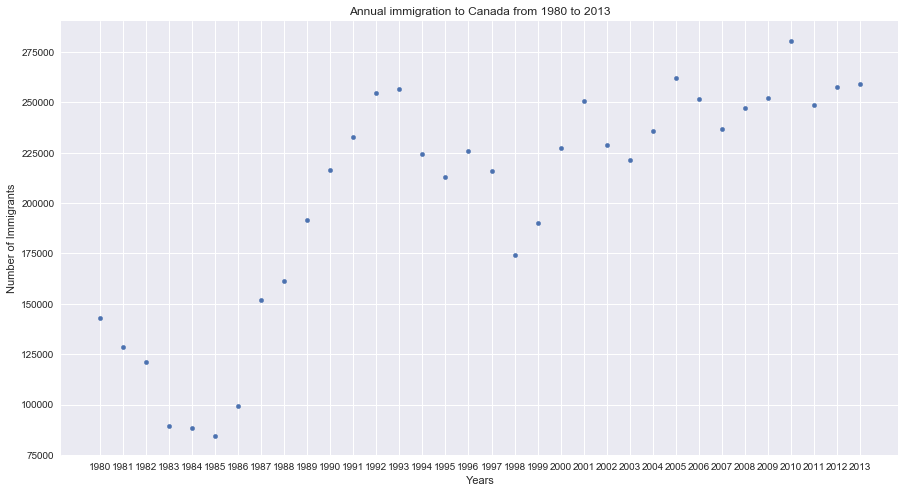

In [311]:
df_tot_fin.plot(
    kind="scatter" , 
    x="year" , 
    y="total" , 
    figsize=(15,8)
)
plt.title("Annual immigration to Canada from 1980 to 2013")
plt.xlabel("Years")
plt.ylabel("Number of Immigrants")

In [414]:
df_tot = pd.DataFrame(df_canada[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,143137
1,1981,128641
2,1982,121175
3,1983,89185
4,1984,88272


## Regression plot - line of best fit
### <font color="red"> Predict the number of immigrants in 2015 </font>
Step 1: Get the equation of line of best fit. We will use **Numpy**'s `polyfit()` method by passing in the following:
- `x`: x-coordinates of the data. 
- `y`: y-coordinates of the data. 
- `deg`: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.

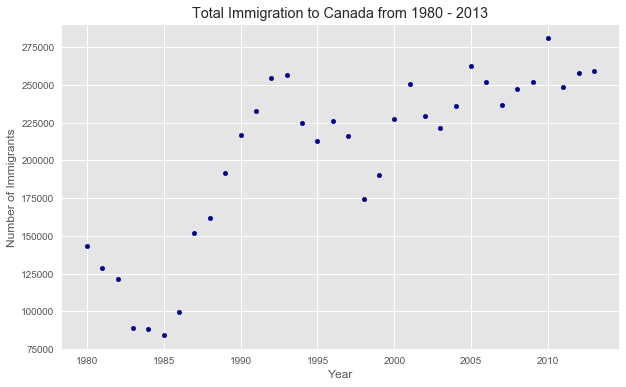

In [415]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [419]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)
fit

array([ 4.76402506e+03, -9.30772273e+06])

The output is an array with the polynomial coefficients, highest powers first. Since we are plotting a linear regression `y= a*x + b`, our output has 2 elements `[5.56709228e+03, -1.09261952e+07]` with the the slope in position 0 and intercept in position 1. 

Step 2: Plot the regression line on the `scatter plot`.

Number of immigrants in 2015 : 4764.0 * 2015 + -9307722.7 = 291787.75767761655



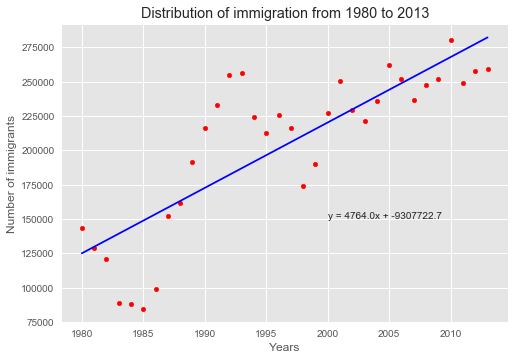

In [429]:
df_tot.plot(kind="scatter" , x='year' , y='total' , color='red')
plt.title("Distribution of immigration from 1980 to 2013")
plt.xlabel("Years")
plt.ylabel("Number of immigrants")

#plot line of best fit
plt.plot(x , fit[0]*x + fit[1] , color="blue" )

plt.annotate("y = {0:.01f}x + {1:.01f}".format(fit[0],fit[1]) , (2000,150000))

im_2015 = fit[0]*2015 + fit[1]
print ("Number of immigrants in 2015 : {0:.01f} * 2015 + {1:.01f} = {2}\n".format(fit[0] , fit[1] , im_2015 ))

# Bubble plot
A `bubble plot` is a variation of the `scatter plot` that displays three dimensions of data (x, y, z). The datapoints are replaced with bubbles, and the size of the bubble is determined by the third variable 'z', also known as the weight. In `maplotlib`, we can pass in an array or scalar to the keyword `s` to `plot()`, that contains the weight of each point.

### A `bubble plot` of immigration from Brazil and Argentina for the years 1980 - 2013!!!

In [438]:
df_can = df_canada[years].copy()
df = df_can.loc[["Argentina" , "Brazil"]].T
df.index = df.index.map(int)
df.reset_index(inplace=True)
df.columns = ["year","argentina","brazil"]
df.head()

,year,argentina,brazil
0,1980,368,211
1,1981,426,220
2,1982,626,192
3,1983,241,139
4,1984,237,145


**Create the normalized weights.**

There are several methods of normalizations in statistics, each with its own use. In this case, we will use [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling) to bring all values into the range [0,1]. The general formula is:

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod3Fig3FeatureScaling.png" align="center">

where *`X`* is an original value, *`X'`* is the normalized value. The formula sets the max value in the dataset to 1, and sets the min value to 0. The rest of the datapoints are scaled to a value between 0-1 accordingly.

In [440]:
norm_brazil = (df["brazil"] - df["brazil"].min())/(df["brazil"].max() -df["brazil"].min() )
norm_argentina = (df["argentina"] - df["argentina"].min())/(df["argentina"].max() - df["argentina"].min())

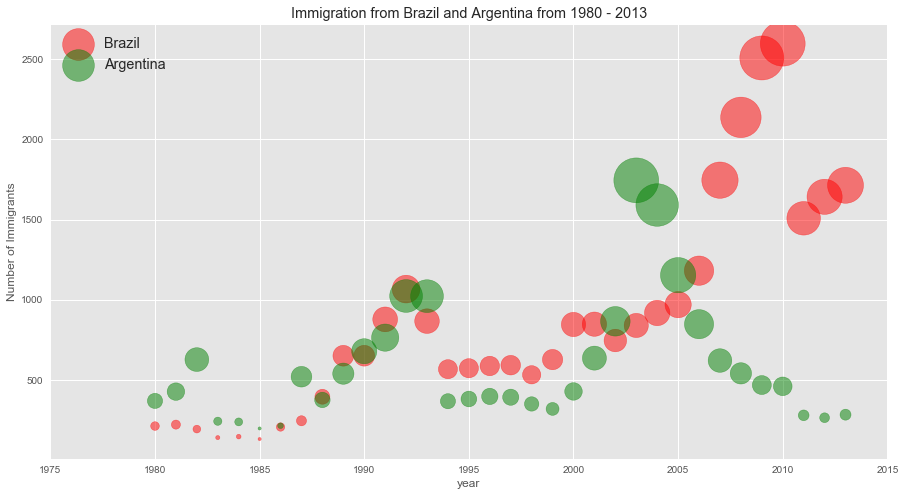

In [454]:
ax1 = df.plot(
    kind="scatter" , 
    color="red",
    x='year',
    y='brazil',
    s=norm_brazil * 2000 + 10,
    figsize=(15,8),
    alpha=0.5,
    xlim=(1975, 2015)
)
df.plot(
    kind="scatter",
    color="green",
    x='year',
    y='argentina',
    s=norm_argentina * 2000 + 10,
    ax=ax1,
    alpha=0.5
)


ax1.set_ylabel('Number of Immigrants')
ax1.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax1.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

# Waffle chart
* Used to highlight progress towards goals
* show contributions in the form of tiles

In [476]:
import matplotlib.patches as mpatches

In [472]:
df_dsn = df_canada.loc[['Denmark', 'Norway', 'Sweden'], :]

In [477]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    
width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

In [478]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class


Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 576x396 with 0 Axes>

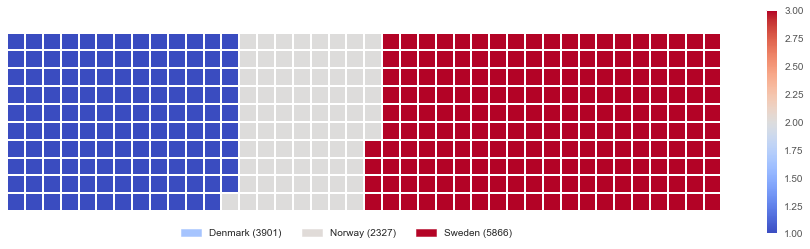

In [479]:
create_waffle_chart(categories, values, height, width, colormap)

# Word Cloud
* depiction of the freq of diff words in some textual data
* the more a word is seen in some text data , the bigger and bolder will be its representation
<img src="wordcloud.png" />

# Seaborn and Regression plots

/Users/vaibhav.singh/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/vaibhav.singh/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/vaibhav.singh/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/vaibhav.singh/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/vaibhav.singh/opt/anaconda3/lib/python3.7/importl

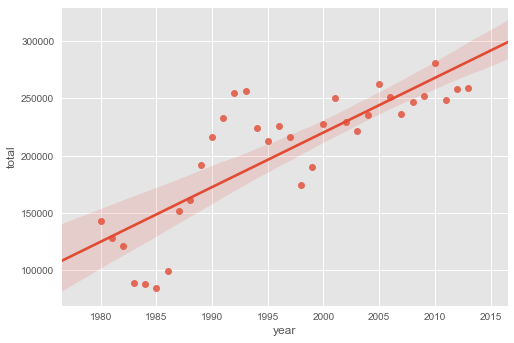

In [457]:
import seaborn as sns
ax = sns.regplot(x='year' , y='total' , data=df_tot)

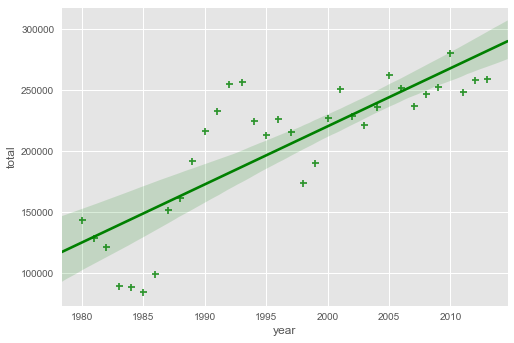

In [458]:
ax = sns.regplot(x='year' , y='total' , data=df_tot , color='green' , marker='+')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

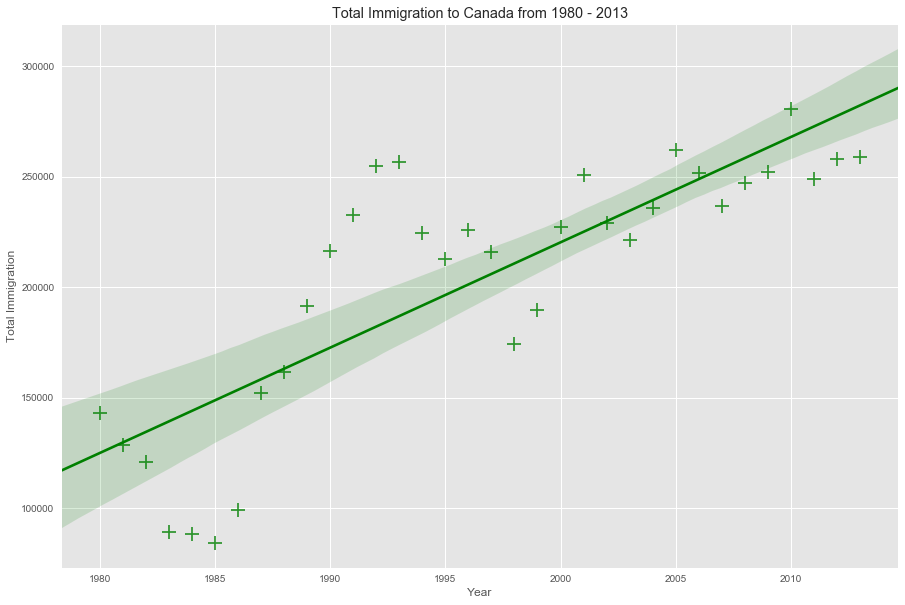

In [480]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

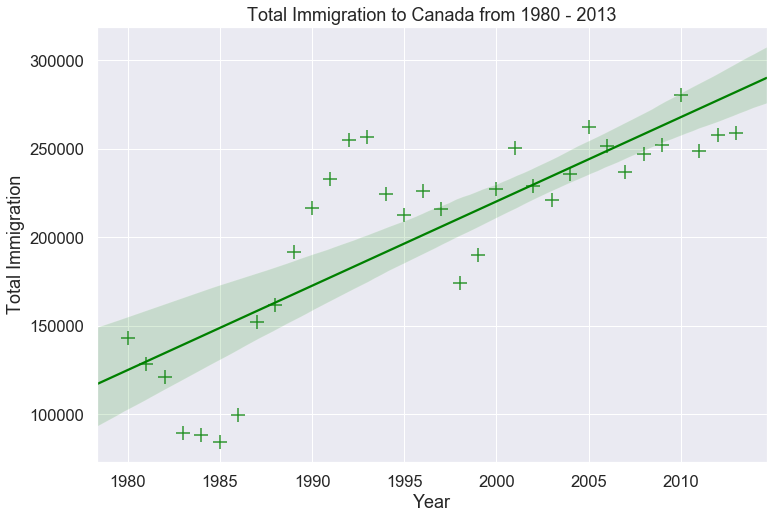

In [481]:
plt.figure(figsize=(12, 8))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

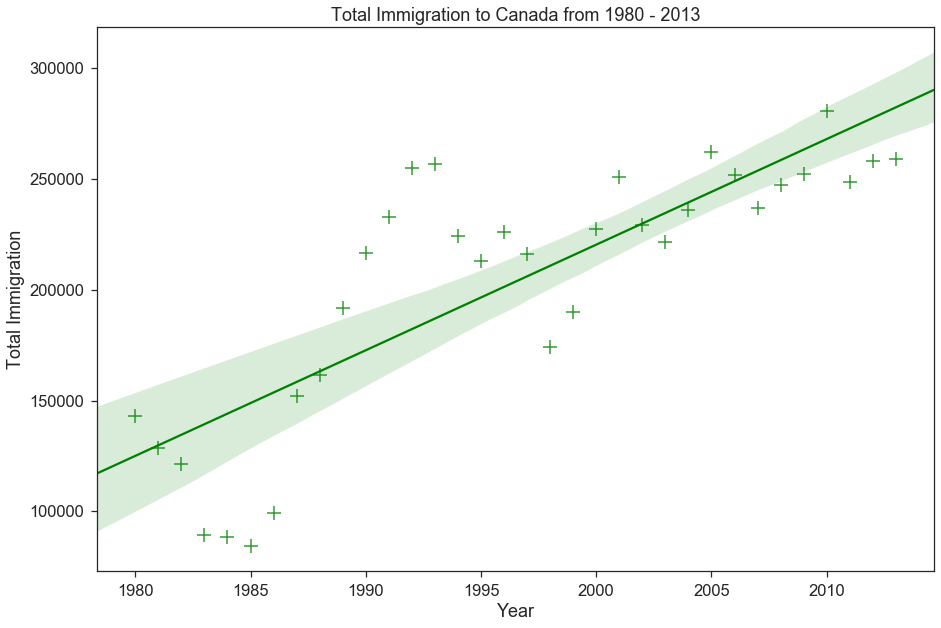

In [482]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks') # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

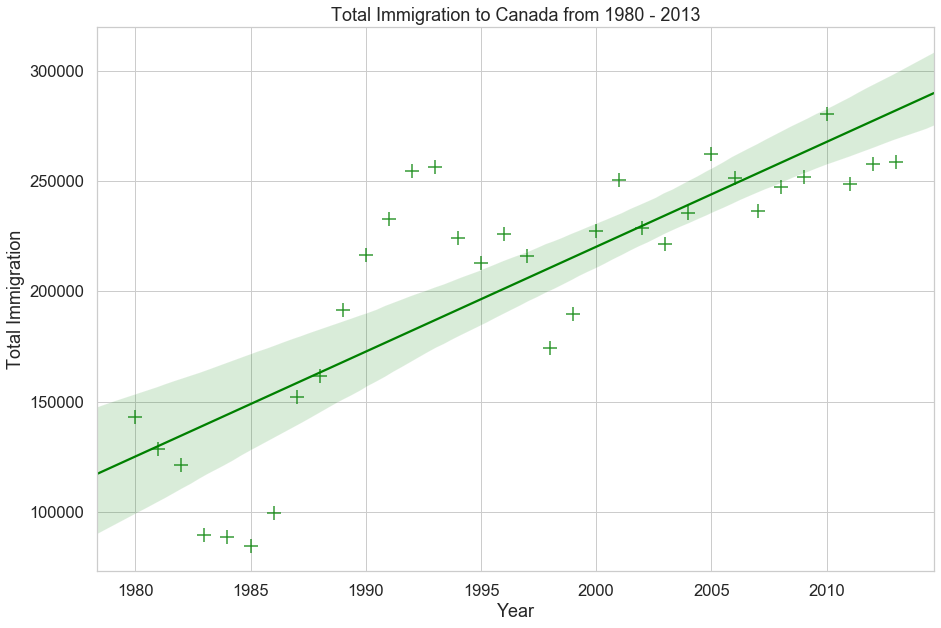

In [483]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

# Introduction to Folium
* Python library that helps to create leaflet maps

In [460]:
pip install folium

     |████████████████████████████████| 102kB 819kB/s ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [462]:
import folium
world_map = folium.Map()
world_map

In [466]:
# map of canada
canada = folium.Map(
    location=[56.130 , -106.35],
    zoom_start=4
)
canada

In [469]:
# map of canada
canada = folium.Map(
    location=[56.130 , -106.35],
    zoom_start=4,
    tiles='Stamen TOner'
)
canada

In [470]:
canada = folium.Map(
    location=[56.130 , -106.35],
    zoom_start=4,
    tiles='Stamen Terrain'
)
canada

In [492]:
df_canada["Region"] = df_canada["Region"].astype("category")

In [500]:
df_canada["Continent"] = df_canada["Continent"].astype("category")

In [497]:
df_canada["Region"]

Country
Afghanistan            Southern Asia
Albania              Southern Europe
Algeria              Northern Africa
American Samoa             Polynesia
Andorra              Southern Europe
                         ...        
Viet Nam          South-Eastern Asia
Western Sahara       Northern Africa
Yemen                   Western Asia
Zambia                Eastern Africa
Zimbabwe              Eastern Africa
Name: Region, Length: 196, dtype: category
Categories (23, object): [Australia and New Zealand, Caribbean, Central America, Central Asia, ..., Western Africa, Western Asia, Western Europe, World]

In [501]:
df_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [502]:
pd.crosstab(df_canada["Continent"],df_canada["Region"])

Region,Australia and New Zealand,Caribbean,Central America,Central Asia,Eastern Africa,Eastern Asia,Eastern Europe,Melanesia,Micronesia,Middle Africa,...,Polynesia,South America,South-Eastern Asia,Southern Africa,Southern Asia,Southern Europe,Western Africa,Western Asia,Western Europe,World
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,0,0,0,0,17,0,0,0,0,9,...,0,0,0,5,0,0,16,0,0,0
Asia,0,0,0,5,0,7,0,0,0,0,...,0,0,10,0,9,0,0,18,0,0
Europe,0,0,0,0,0,0,10,0,0,0,...,0,0,0,0,0,14,0,0,9,0
Latin America and the Caribbean,0,13,8,0,0,0,0,0,0,0,...,0,12,0,0,0,0,0,0,0,0
Northern America,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Oceania,2,0,0,0,0,0,0,4,4,0,...,4,0,0,0,0,0,0,0,0,0
World,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


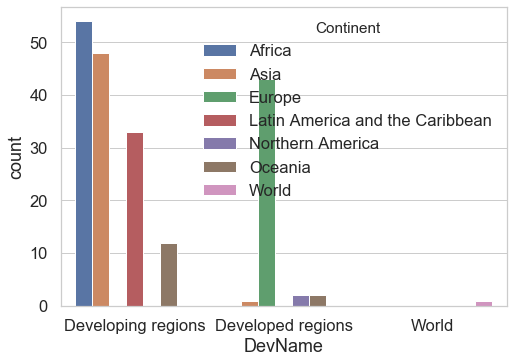

In [508]:
sns.countplot(x ='DevName' , hue='Continent' , data=df_canada )


In [525]:
cols = df_canada.columns[4:8]
df = df_canada[cols]
df.reset_index(inplace=True , drop=True)
df

,1981,1982,1983,1984
0,39,39,47,71
1,0,0,0,0
2,67,71,69,63
3,1,0,0,0
4,0,0,0,0
...,...,...,...,...
191,1829,2162,3404,7583
192,0,0,0,0
193,2,1,6,0
194,17,11,7,16


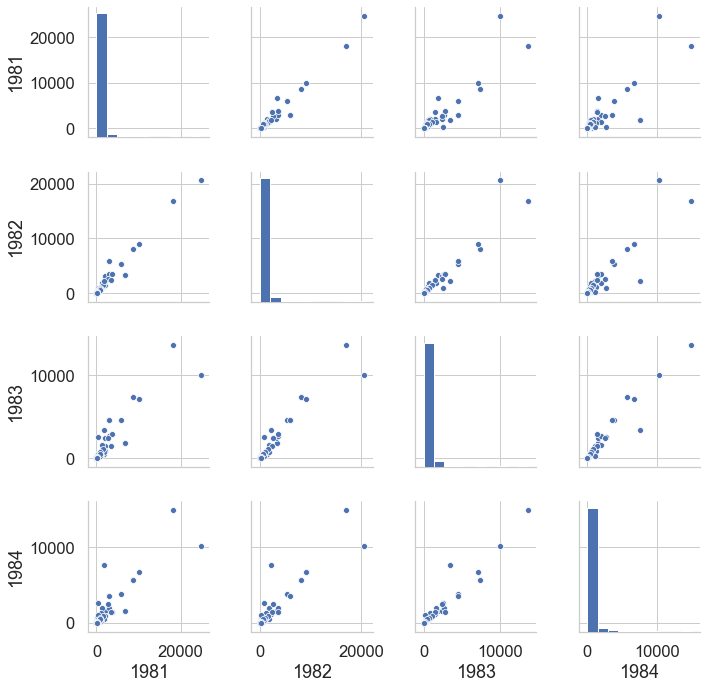

In [526]:
sns.pairplot(df)